***ECE685D Homework #2***

**Dmitrii/Dima Tsvetkov**

**NetID: dt169**

Agreement 1) This assignment represents my own work. I did not work on this assignment with
others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether
this is the correct class for me to take. I understand that the homework only gets harder.

***Problem 1: Simple MLP for regression***

**Part (1) Back propagation (15pts)**

We have tke following 3-layer fully connected NN:
$$\( h_1 = g(W_1^T x + b_1) \),$$
$$\( h_2 = g(W_2^T h_1 + b_2) \),$$
$$\( \hat{y} = W_3^T h_2 + b_3 \),$$
with the loss function:
$$\[ L(Y,\hat{Y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y}_i)^2 \].$$

Let's derive gradient w.r.t. $W_3$ and $b_3$ using the chain rule:
$$\[\frac{\partial L}{\partial \hat{y}} = \frac{2}{N}(\hat{y} - y)\],$$
where for simplicity I dropped index $i$. Thus,
$$\[\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W_3} = \frac{2}{N}(\hat{y} - y) \cdot h_2\],$$
$$\[\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b_3} = \frac{2}{N}(\hat{y} - y)\].$$

Now we can calculate gradients w.r.t. $W_2$ and $b_2$ using the chain rule and $\frac{\partial L}{\partial h_2}$:
$$\[\frac{\partial L}{\partial h_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial h_2} = \frac{2}{N}(\hat{y} - y) \cdot W_3\],$$
$$\[\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial h_2} \cdot \frac{\partial h_2}{\partial W_2} = \frac{\partial L}{\partial h_2} \cdot g'(W_2^T h_1 + b_2) \cdot h_1\],$$
$$\[\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial h_2} \cdot \frac{\partial h_2}{\partial b_2} = \frac{\partial L}{\partial h_2} \cdot g'(W_2^T h_1 + b_2)\].
$$


Same for gradients w.r.t. $W_2$ and $b_2$:
$$\[\frac{\partial L}{\partial h_1} = \frac{\partial L}{\partial h_2} \cdot \frac{\partial h_2}{\partial h_1} = \frac{\partial L}{\partial h_2} \cdot g'(W_2^T h_1 + b_2) \cdot W_2\],$$
$$\[\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial W_1} = \frac{\partial L}{\partial h_1} \cdot g'(W_1^T x + b_1) \cdot x\],$$
$$\[\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial b_1} = \frac{\partial L}{\partial h_1} \cdot g'(W_1^T x + b_1)\].$$

We can also insert all the intermediate steps into the final expressions and get the following:
Gradient w.r.t. $W_1$:
$$\[\frac{\partial L}{\partial W_3} = \frac{2}{N}(\hat{y} - y) \cdot h_2\],$$
w.r.t. $b_1$:
$$\[\frac{\partial L}{\partial b_3} = \frac{2}{N}(\hat{y} - y)\].$$
w.r.t. $W_2$:
$$\[\frac{\partial L}{\partial W_2} = \frac{2}{N}(\hat{y} - y) \cdot W_3 \cdot g'(W_2^T h_1 + b_2) \cdot h_1\],$$
w.r.t. $b_2$:
$$\[\frac{\partial L}{\partial b_2} = \frac{2}{N}(\hat{y} - y) \cdot W_3 \cdot g'(W_2^T h_1 + b_2)\].$$
w.r.t. $W_3$:
$$\[\frac{\partial L}{\partial W_1} = \frac{2}{N}(\hat{y} - y) \cdot W_3 \cdot g'(W_2^T h_1 + b_2) \cdot W_2 \cdot g'(W_1^T x + b_1) \cdot x\],$$
w.r.t. $b_3$:
$$\[\frac{\partial L}{\partial b_1} = \frac{2}{N}(\hat{y} - y) \cdot W_3 \cdot g'(W_2^T h_1 + b_2) \cdot W_2 \cdot g'(W_1^T x + b_1)\].$$

**Part (2) Vanishing gradient problem (10pts)**

As the depth $k$ of our MLP increases, we are interested in the behavior of the gradient of the loss with respect to $h_1$:
$$\nabla_{h1} L(\theta).$$

For any two consecutive layers:
$$ h_{i+1} = g(W_{i+1}^T h_i + b_{i+1}). $$

The gradient of $h_{i+1}$ w.r.t. $h_i$ can be written as:
$$ \nabla_{h_i} h_{i+1} = W_{i+1}^T \cdot g'(W_{i+1}^T h_i + b_{i+1}). $$

The gradient of the loss $L$ w.r.t. $h_1$, when considering up to the $k$-th layer, as we showed above in the previous problem, becomes a product of such gradients across all layers from 1 to $k$:
$$ \nabla_{h1} L = W_k^T \cdot g'(W_k^T h_{k-1} + b_k) \cdot ... \cdot W_2^T \cdot g'(W_2^T h_1 + b_2). $$

Given the sub-multiplicative property:
$$ ||AB||_2 \leq ||A||_2 ||B||_2. $$

For the norm of $\nabla_{h1} L$ we have:
$$ ||\nabla_{h1} L||_2 \leq ||W_2||_2 \cdot ||W_3||_2 \cdot ... \cdot ||W_k||_2 \cdot |g'(x)|^{k-1}. $$

Each matrix norm $ ||W_i||_2 $ is less than 1. The derivative of the activation function, $g'$, is bounded so $ |g'(x)| $ is less than or equal to some constant $c$, where $ 0 \leq c \leq 1 $ (considering a 1-Lipschitz function).

and thus, as $ k \to \infty $, the expression
$$ ||W_2||_2 \cdot ||W_3||_2 \cdot ... \cdot ||W_k||_2 \cdot c^{k-1}, $$
will go 0, as function $|y|^{k-1}$ where $|y|<1$.

***Problem 2: MLP for Wine (15pts)***

In [47]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Let's download the dataset and split it into 3 parts according to the problem (train, validation, test).

In [48]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
# print(data)

# separate labels
X = data.drop("quality", axis=1).values
y = data["quality"].values

# Train/validation/test split 20% test, then 64% train, 16% validation
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=1)


Now we can standardize the features using sklearn.preprocessing.StandardScaler and convert everything to torch Tensors.

In [49]:

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

Now let's create torch Dataset for our data so we can use dataloader.

In [50]:
class WineDataset(Dataset):
	def __init__(self, X, y):
		self.X = X
		self.y = y

	def __len__(self):
		return len(self.y)

	def __getitem__(self, idx):
		return self.X[idx], self.y[idx]


# Create dataset objects
train_dataset = WineDataset(X_train_tensor, y_train_tensor)
val_dataset = WineDataset(X_val_tensor, y_val_tensor)
test_dataset = WineDataset(X_test_tensor, y_test_tensor)

Creating data loaders with 64 batch size.

In [51]:
# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Creating our MLP with k=3 with 1 hidden layer. Number of nodes in the layer is controlled with the hidden_size parameter.
Since the problem says "at least 3 hidden layers", I will add 1 extra layer compared to the problem 1.

In [99]:
class MLP(nn.Module):
	def __init__(self, input_dim, hidden_size=64):
		super(MLP, self).__init__()
		self.layer1 = nn.Linear(input_dim, hidden_size)
		self.layer2 = nn.Linear(hidden_size, hidden_size)
		self.layer3 = nn.Linear(hidden_size, hidden_size)
		self.layer4 = nn.Linear(hidden_size, 1)
		self.relu = nn.ReLU()

	def forward(self, x):
		x = self.relu(self.layer1(x))
		x = self.relu(self.layer2(x))
		x = self.relu(self.layer3(x))
		x = self.layer4(x)
		return x

Main part with the training. For loss we are using the mean squared error.

In [100]:
# Hyperparameters
learning_rate = 0.001
epochs = 1500

# Model, Loss and Optimizer
model = MLP(X_train.shape[1], hidden_size=32)
criterion = nn.MSELoss()  # MSE Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
test_losses = []
epochs_array = []

# Training using DataLoaders
for epoch in range(epochs):
	epoch_train_losses = []
	model.train()  # Set the model to training mode
	for batch_X, batch_y in train_loader:
		optimizer.zero_grad()
		outputs = model(batch_X).squeeze()
		loss = criterion(outputs, batch_y)
		loss.backward()
		optimizer.step()
		epoch_train_losses.append(loss.item())

	# Validation
	if (not (epoch + 1) % 50) and (epoch != 0):
		train_losses.append(np.mean(epoch_train_losses))
		model.eval()  # Set the model to evaluation mode
		with torch.no_grad():
			epoch_val_losses = [criterion(model(batch_X).squeeze(), batch_y).item() for batch_X, batch_y in val_loader]
		val_losses.append(np.mean(epoch_val_losses))
		with torch.no_grad():
			epoch_test_losses = [criterion(model(batch_X).squeeze(), batch_y).item() for batch_X, batch_y in
			                     test_loader]
		test_losses.append(np.mean(epoch_test_losses))
		epochs_array.append(epoch + 1)
		print(
			f"Epoch {epoch + 1}/{epochs}, Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}, Test Loss: {test_losses[-1]}")

Epoch 50/1500, Loss: 0.5345708597451448, Validation Loss: 0.5081195458769798, Test Loss: 0.49770029783248904
Epoch 100/1500, Loss: 0.457253685221076, Validation Loss: 0.4453854188323021, Test Loss: 0.43554829955101015
Epoch 150/1500, Loss: 0.42441771551966667, Validation Loss: 0.41945599019527435, Test Loss: 0.4102044582366943
Epoch 200/1500, Loss: 0.4057809095829725, Validation Loss: 0.40787172317504883, Test Loss: 0.3998748898506165
Epoch 250/1500, Loss: 0.3934624083340168, Validation Loss: 0.39874717593193054, Test Loss: 0.391267329454422
Epoch 300/1500, Loss: 0.38425938598811626, Validation Loss: 0.3935346379876137, Test Loss: 0.38826786279678344
Epoch 350/1500, Loss: 0.3767749723047018, Validation Loss: 0.3895248472690582, Test Loss: 0.3868528187274933
Epoch 400/1500, Loss: 0.3716909680515528, Validation Loss: 0.3871316984295845, Test Loss: 0.38643741607666016
Epoch 450/1500, Loss: 0.36716616712510586, Validation Loss: 0.38578129559755325, Test Loss: 0.3873490929603577
Epoch 500/1

Plotting all the losses vs epochs below. As we can see, with our parameters, minimum validation loss is obtained after ~600 epochs. More training only leading to the overfitting, so we should stop after 600 epochs, if we use the same parameters I used above. Also,
kinda a big gap between training and validation loss looks like an overfitting as well. Probably, we need to consider adding regularization (like dropout) or decreasing the model's complexity.

Train Loss after 600 epochs: 0.3886131703853607


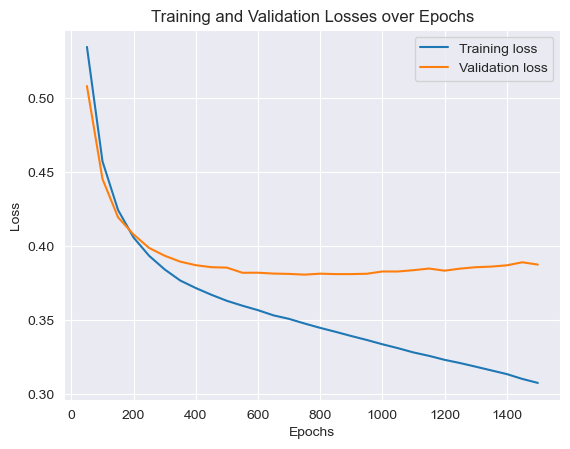

In [104]:
import matplotlib.pyplot as plt

plt.plot(epochs_array, train_losses, label='Training loss')
plt.plot(epochs_array, val_losses, label='Validation loss')
# plt.plot(epochs_array, test_losses, label='Test loss')
print(f'Train Loss after 600 epochs: {test_losses[12]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses over Epochs')
plt.show()

 Wine quality, in its original form, is a discrete label. But it behaves some sort of a continuos value with rounding, not as different classes label by different numbers. Treating it as continuous can make sense for regression tasks if we want to predict more precise differences between quality levels. This allows us to get more accurate predictions than just discrete class outputs.
Sometimes it might be harder to interprete this non-discrete values but in that case it makes sense. We always can just round the value to the desired precision in that problem.
(All of that makes sense if and only if the wine quality is actually proportional to the data in this dataset and not justt represent some classes of wine where higher number not necessary mean higher quality).

***Problem 3: Batch Size,Learning Rate and LR Scheduling (30pts)***

I have been testing this code running on my GPU and my CPU. CPU goes faster, probably because the MLP model we using here is not very complex. The number of parameters is too small to use my GPU here.

In [108]:
from torch.optim.lr_scheduler import StepLR
import time

# torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

results = {}

learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [16, 160, 1600]
lr_decays = [0.1, 0.001, 0.0001]
optimizers = {
	'SGD': optim.SGD,
	'Adam': optim.Adam
}
epochs = 1000
step_size = 30  # StepLR
gpu = False

for lr in learning_rates:
	for batch in batch_sizes:
		for decay in lr_decays:
			for name, optimizer_func in optimizers.items():
				start_time = time.time()
				# 'SGD': optim.SGD(model.parameters(), lr=lr),
				model = MLP(X_train.shape[1], hidden_size=32)
				if gpu:  # turning on gpu calculations
					model.to(device)
				optimizer = optimizer_func(model.parameters(), lr=lr)
				criterion = nn.MSELoss()
				scheduler = StepLR(optimizer, step_size=step_size, gamma=decay)
				train_losses = []
				val_losses = []
				for epoch in range(epochs):  # main train loop
					epoch_train_losses = []
					model.train()  # Set the model to training mode
					for batch_X, batch_y in train_loader:
						if gpu:
							batch_X, batch_y = batch_X.to(device), batch_y.to(device)
						optimizer.zero_grad()
						outputs = model(batch_X).squeeze()
						loss = criterion(outputs, batch_y)
						loss.backward()
						optimizer.step()
						epoch_train_losses.append(loss.item())
					# Validation loop every epochs // N steps
					if (not (epoch + 1) % (epochs // 1000)) and (epoch != 0):
						train_losses.append(np.mean(epoch_train_losses))
						model.eval()  # Set the model to evaluation mode
						with torch.no_grad():
							epoch_val_losses = []
							for batch_X, batch_y in val_loader:
								if gpu:
									batch_X, batch_y = batch_X.to(device), batch_y.to(device)
								epoch_val_losses.append(criterion(model(batch_X).squeeze(), batch_y).item())
						val_losses.append(np.mean(epoch_val_losses))
						epochs_array.append(epoch + 1)
				# calculating final Loss
				model.eval()
				with torch.no_grad():
					test_losses = []
					for batch_X, batch_y in test_loader:
						if gpu:
							batch_X, batch_y = batch_X.to(device), batch_y.to(device)
						test_losses.append(criterion(model(batch_X).squeeze(), batch_y).item())
					test_loss = np.mean(test_losses)
				end_time = time.time()
				elapsed_time = end_time - start_time
				print(f'{name}: lr={lr}, batch={batch}, decay={decay}; Time taken: {elapsed_time:.2f}s')
				print(f'Losses: {train_losses[-1]:.5f} (train), {val_losses[-1]:.5f} (val), {test_loss:.5f} (test)')
				# saving all the results
				results[(name, lr, batch, decay)] = (train_losses, val_losses, test_loss, elapsed_time)

cuda:0
SGD: lr=0.01, batch=16, decay=0.1; Time taken: 23.02s
Losses: 0.15660 (train), 0.46639 (val), 0.57083 (test)
Adam: lr=0.01, batch=16, decay=0.1; Time taken: 29.21s
Losses: 0.03358 (train), 0.61933 (val), 0.67471 (test)
SGD: lr=0.01, batch=16, decay=0.001; Time taken: 21.34s
Losses: 0.10359 (train), 0.47786 (val), 0.59970 (test)
Adam: lr=0.01, batch=16, decay=0.001; Time taken: 29.61s
Losses: 0.03443 (train), 0.60641 (val), 0.77077 (test)
SGD: lr=0.01, batch=16, decay=0.0001; Time taken: 21.03s
Losses: 0.17444 (train), 0.44434 (val), 0.48484 (test)
Adam: lr=0.01, batch=16, decay=0.0001; Time taken: 28.31s
Losses: 0.01334 (train), 0.58898 (val), 0.65342 (test)
SGD: lr=0.01, batch=160, decay=0.1; Time taken: 20.68s
Losses: 0.15975 (train), 0.43097 (val), 0.54000 (test)
Adam: lr=0.01, batch=160, decay=0.1; Time taken: 28.45s
Losses: 0.04404 (train), 0.53879 (val), 0.74470 (test)
SGD: lr=0.01, batch=160, decay=0.001; Time taken: 22.69s
Losses: 0.15695 (train), 0.40527 (val), 0.51987 

In [159]:
def train(model, device, train_loader, criterion, optimizer, batch_prints=1):
	train_loss = 0
	model.train()  # what is the training mode?
	for batch_idx, (data, target) in enumerate(train_loader):
		data, target = data.to(device), target.to(device)
		optimizer.zero_grad()
		output = model(data).squeeze()
		loss = criterion(output, target)
		loss.backward()
		optimizer.step()
		train_loss += loss.item()
		if batch_prints:
			if (batch_idx + 1) % (len(train_loader) // batch_prints) == 0:
				print(f'Loss: {train_loss / (batch_idx + 1) / len(target):.5f} (train)')
	return train_loss / len(train_loader.dataset)

def test(model, device, test_loader, criterion):
	test_loss = 0
	model.eval()
	with torch.no_grad():
		for data, target in test_loader:
			data, target = data.to(device), target.to(device)
			output = model(data).squeeze()
			test_loss += criterion(output, target).item()  # sum up batch loss
	return test_loss / len(test_loader.dataset)


In [173]:
from torch.optim.lr_scheduler import StepLR
import time

# torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

results = {}

learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [16, 160, 1600]
lr_decays = [0.1, 0.001, 0.0001]
optimizers = {
	'SGD': optim.SGD,
	'Adam': optim.Adam
}
epochs = 100
step_size_scheduler = 30  # StepLR
hidden_size = 32  # number of neurones in hidden layers

criterion = nn.MSELoss()
for name, optimizer_func in optimizers.items():
	for lr in learning_rates:
		for batch in batch_sizes:
			for decay in lr_decays:
				model = MLP(X_train.shape[1], hidden_size=hidden_size)
				model.to(device)
				optimizer = optimizer_func(model.parameters(), lr=lr)
				scheduler = StepLR(optimizer, step_size=step_size_scheduler, gamma=decay)
				train_losses = []
				val_losses = []
				start_time = time.time()
				for epoch in range(epochs):
					loss_train = train(model, device, train_loader, criterion, optimizer, batch_prints=0)
					loss_val = test(model, device, val_loader, criterion)
					scheduler.step()
					if epoch % 1 == 0:
						train_losses.append(loss_train)
						val_losses.append(loss_val)
						# print(f'Optimizer Learning rate: {optimizer.param_groups[0]["lr"]:.5f}')
				test_loss = test(model, device, test_loader, criterion)
				end_time = time.time()
				elapsed_time = end_time - start_time
				print(f'{name}: lr={lr}, batch={batch}, decay={decay}; Time taken: {elapsed_time:.2f}s')
				print(f'Losses: {train_losses[-1]:.5f} (train), {val_losses[-1]:.5f} (val), {test_loss:.5f} (test)')
				# saving all the results
				results[(name, lr, batch, decay)] = (train_losses, val_losses, test_loss, elapsed_time)

cpu
SGD: lr=0.01, batch=16, decay=0.1; Time taken: 3.02s
Losses: 0.00621 (train), 0.00633 (val), 0.00614 (test)
SGD: lr=0.01, batch=16, decay=0.001; Time taken: 2.37s
Losses: 0.00611 (train), 0.00607 (val), 0.00598 (test)
SGD: lr=0.01, batch=16, decay=0.0001; Time taken: 2.35s
Losses: 0.00628 (train), 0.00588 (val), 0.00605 (test)
SGD: lr=0.01, batch=160, decay=0.1; Time taken: 2.19s
Losses: 0.00606 (train), 0.00596 (val), 0.00623 (test)
SGD: lr=0.01, batch=160, decay=0.001; Time taken: 2.51s
Losses: 0.00615 (train), 0.00600 (val), 0.00613 (test)
SGD: lr=0.01, batch=160, decay=0.0001; Time taken: 2.77s
Losses: 0.00618 (train), 0.00617 (val), 0.00585 (test)
SGD: lr=0.01, batch=1600, decay=0.1; Time taken: 2.24s
Losses: 0.00591 (train), 0.00625 (val), 0.00632 (test)
SGD: lr=0.01, batch=1600, decay=0.001; Time taken: 2.56s
Losses: 0.00601 (train), 0.00634 (val), 0.00627 (test)
SGD: lr=0.01, batch=1600, decay=0.0001; Time taken: 2.18s
Losses: 0.00652 (train), 0.00645 (val), 0.00674 (test)


[0.006144549511373043, 0.007068269327282906, 0.005983348004519939, 0.006809277273714542, 0.006050930172204971, 0.007373571675270796, 0.006228158157318831, 0.00712848287075758, 0.006132685020565987, 0.00655694305896759, 0.005845201574265957, 0.006909656152129173, 0.006316290237009525, 0.007089716475456953, 0.006266691628843546, 0.0069703741930425165, 0.006738752499222756, 0.00734286243095994, 0.008272184710949659, 0.0075790204107761385, 0.009159866254776716, 0.008955541159957647, 0.008670485951006413, 0.008054322097450495, 0.009069408103823662, 0.007649436034262181, 0.01000993736088276, 0.007119313906878233, 0.010050901584327221, 0.008462549373507499, 0.008193449955433607, 0.007981001585721969, 0.008040776196867227, 0.008198687341064215, 0.008523484878242015, 0.008166971243917942, 0.3355777621269226, 0.057028334587812424, 0.33826711773872375, 0.08326228410005569, 0.36656767725944517, 0.11549470275640487, 0.38318111896514895, 0.08684501498937607, 0.36316682696342467, 0.09371880888938904,

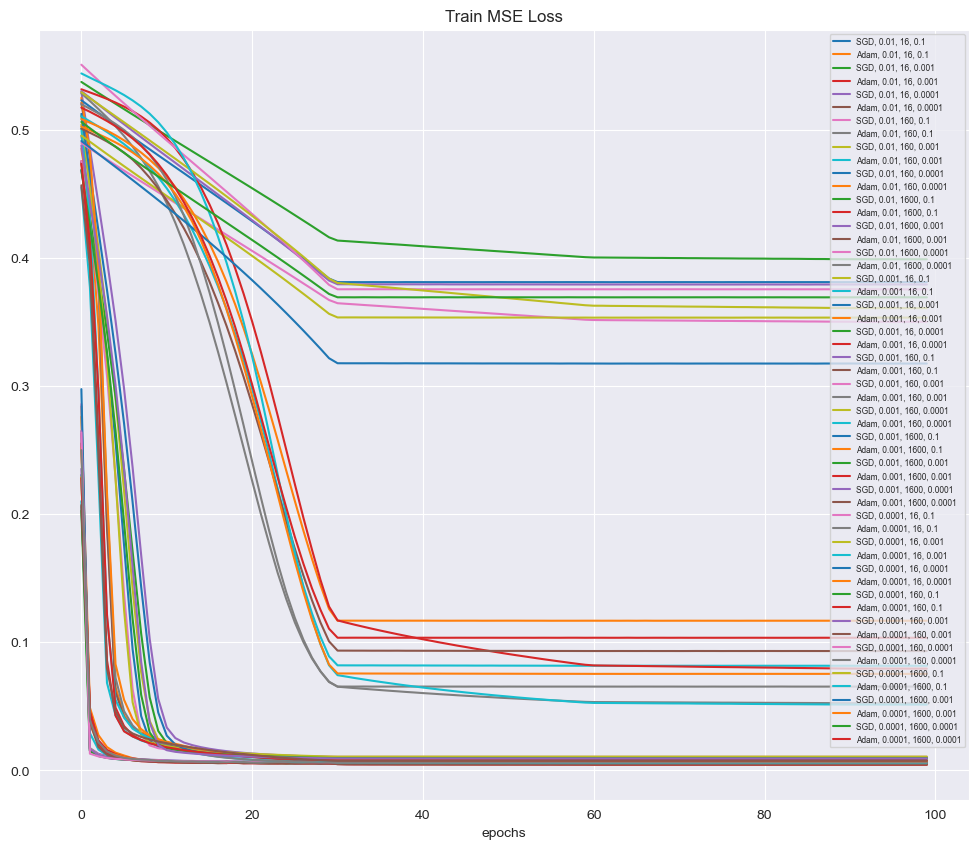

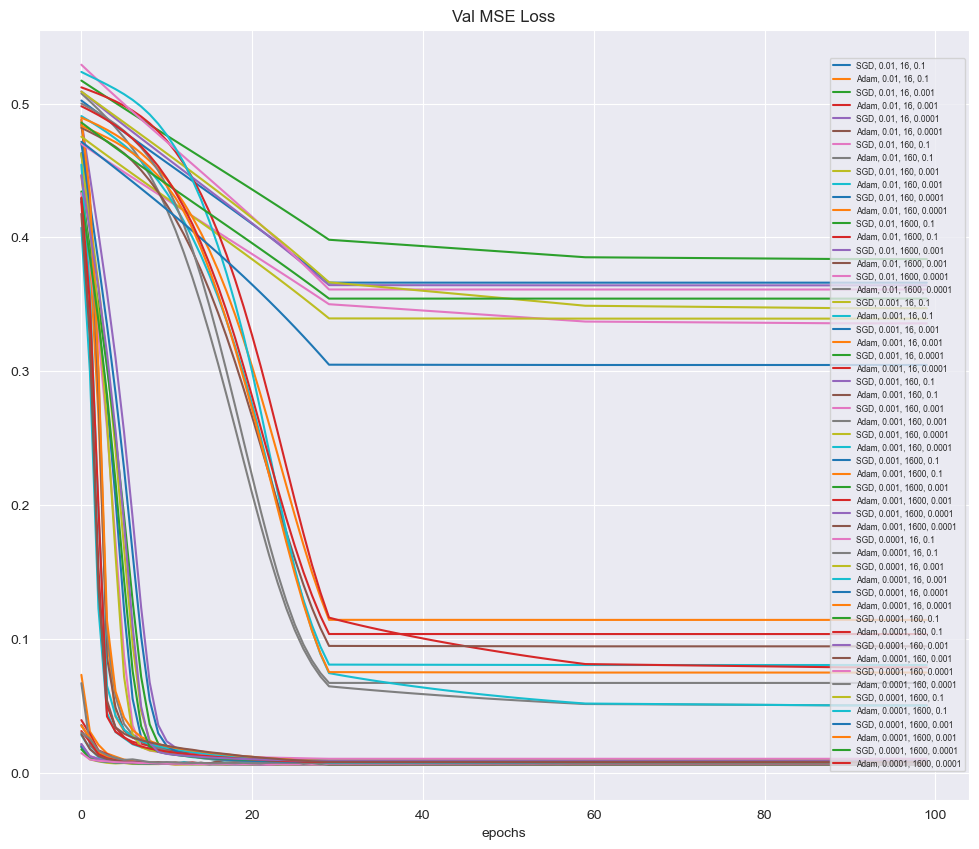

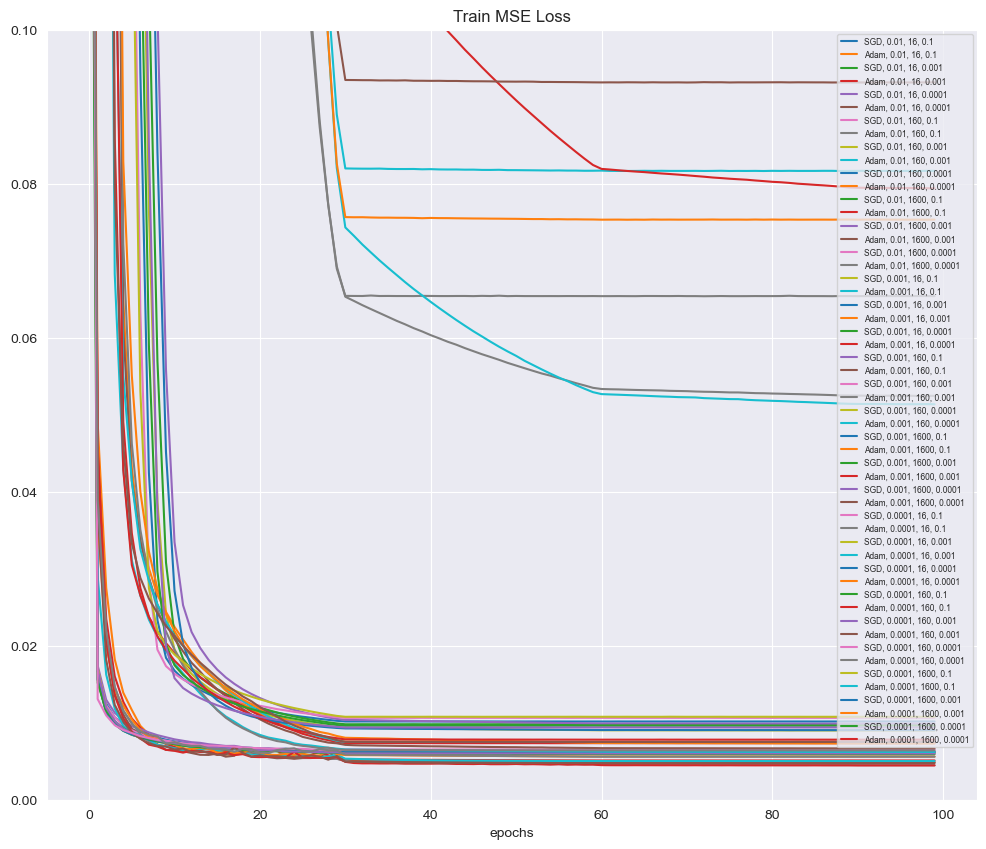

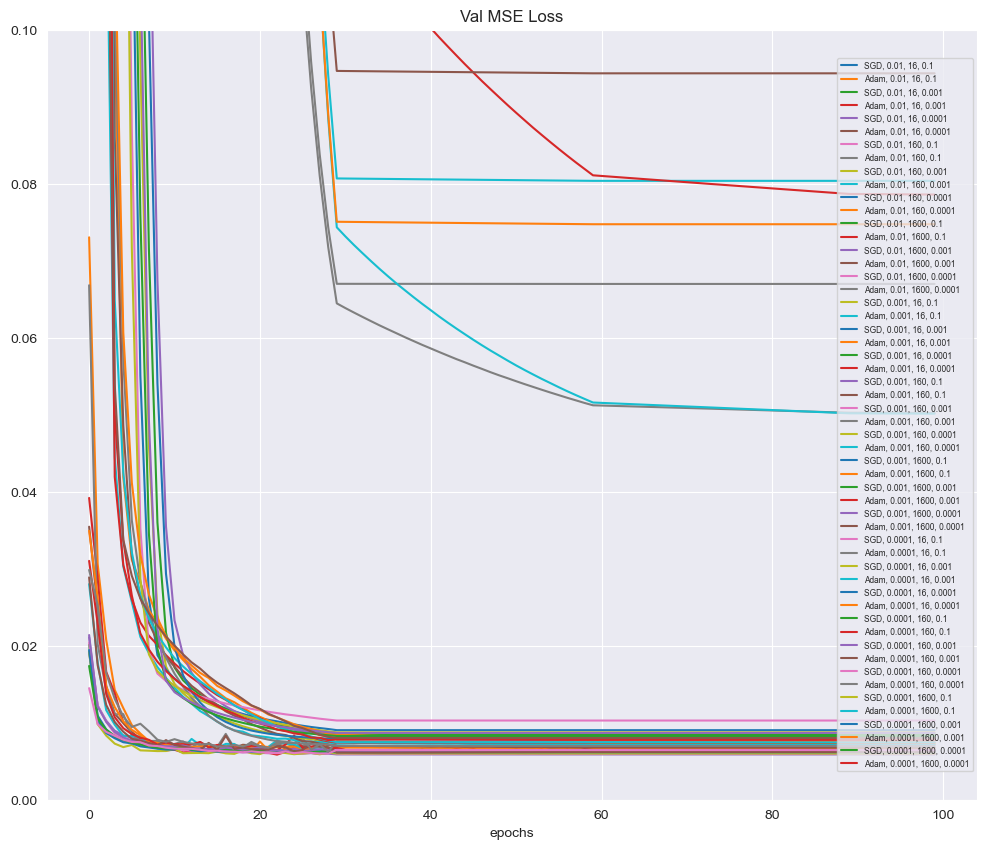

In [174]:
# Extract names and values
names = [item[0] for item in results]
train_losses_all = [item[-1] for item in results]
val_losses = [item[-1] for item in results]
test_loss = [item[-1] for item in results]
elapsed_time = [item[-1] for item in results]
epochs = np.arange(0, 100, 1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
fig2, ax2 = plt.subplots(figsize=(12, 10))
fig2, ax3 = plt.subplots(figsize=(12, 10))
fig2, ax4 = plt.subplots(figsize=(12, 10))
losses_test = []
times = []
for lr in learning_rates:
	for batch in batch_sizes:
		for decay in lr_decays:
			for name, optimizer_func in optimizers.items():
				train_losses, val_losses, test_loss, elapsed_time = results[(name, lr, batch, decay)]
				losses_test.append(test_loss)
				times.append(elapsed_time)
				ax1.plot(epochs, train_losses, label=f'{name}, {lr}, {batch}, {decay}')
				ax1.set_title('Train MSE Loss')
				ax1.set_xlabel('epochs')
				ax1.legend(fontsize="6")
				ax3.plot(epochs, train_losses, label=f'{name}, {lr}, {batch}, {decay}')
				ax3.set_title('Train MSE Loss')
				ax3.set_xlabel('epochs')
				ax3.legend(fontsize="6")
				ax3.set_ylim(0, 0.1)
				ax2.plot(epochs, val_losses, label=f'{name}, {lr}, {batch}, {decay}')
				ax2.set_title('Val MSE Loss')
				ax2.set_xlabel('epochs')
				ax2.legend(fontsize="6", loc='right')
				ax4.plot(epochs, val_losses, label=f'{name}, {lr}, {batch}, {decay}')
				ax4.set_title('Val MSE Loss')
				ax4.set_xlabel('epochs')
				ax4.legend(fontsize="6", loc='right')
				ax4.set_ylim(0, 0.1)
				# ax2.legend(f'{name}, {lr}, {batch}, {decay}')
print(losses_test)
print(times)
# Display the exact numbers on the bars
# for i, v in enumerate(values):
#     ax.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.show()

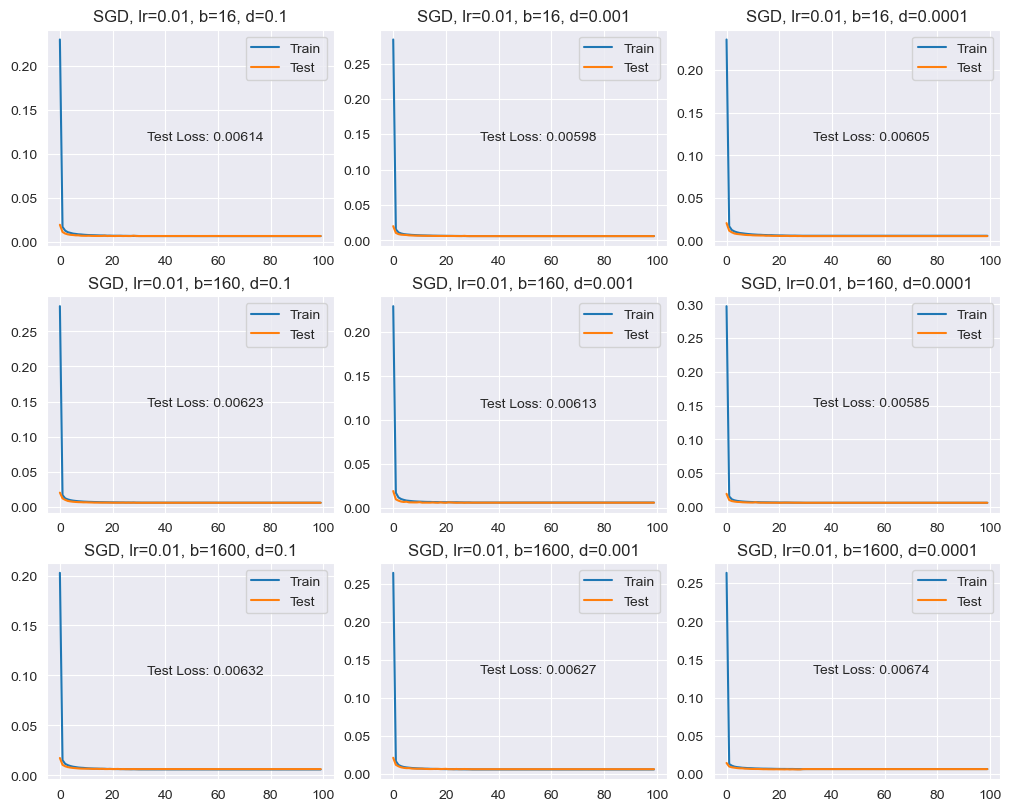

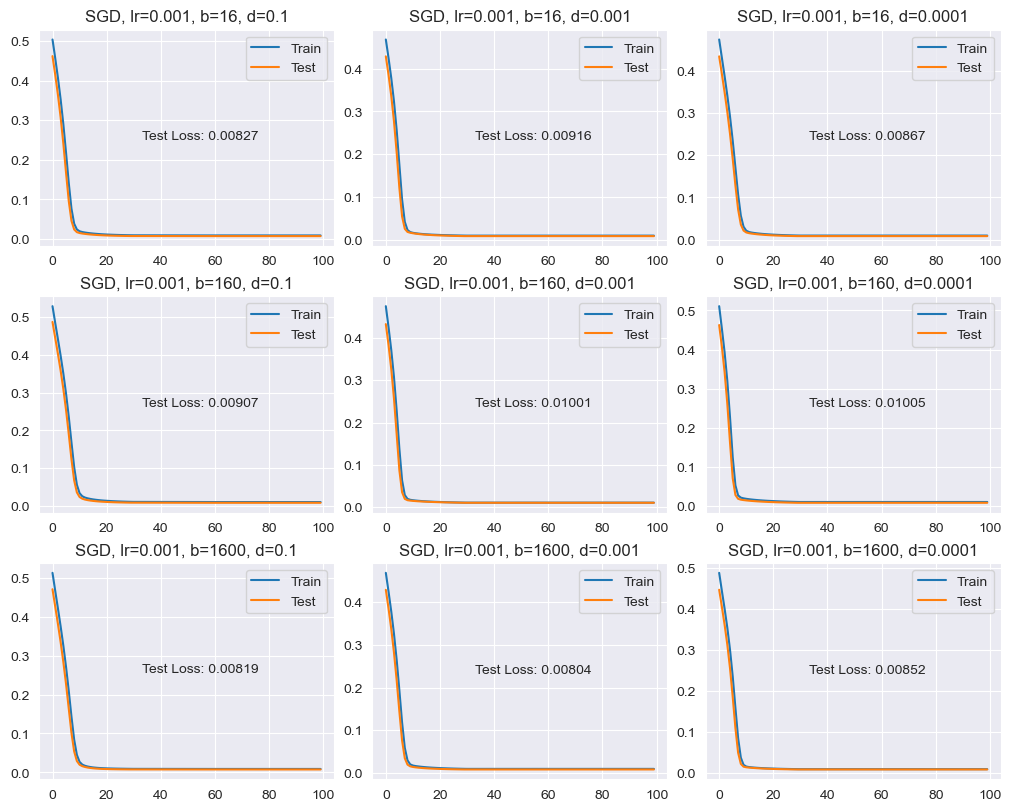

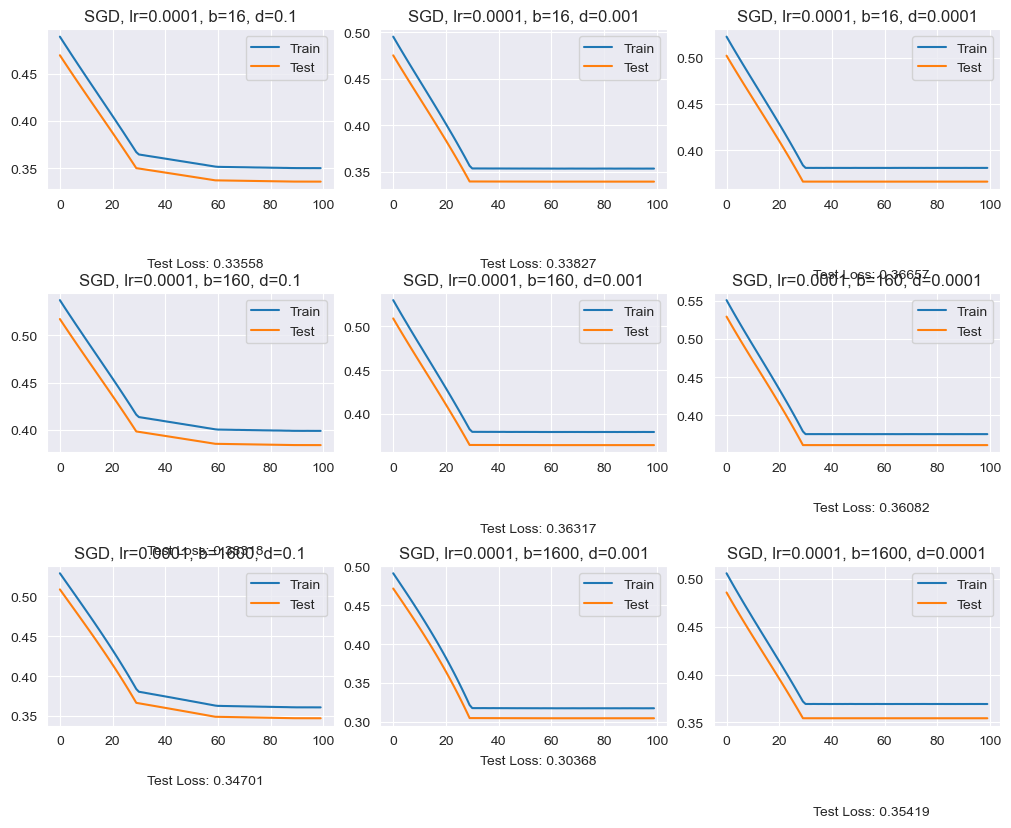

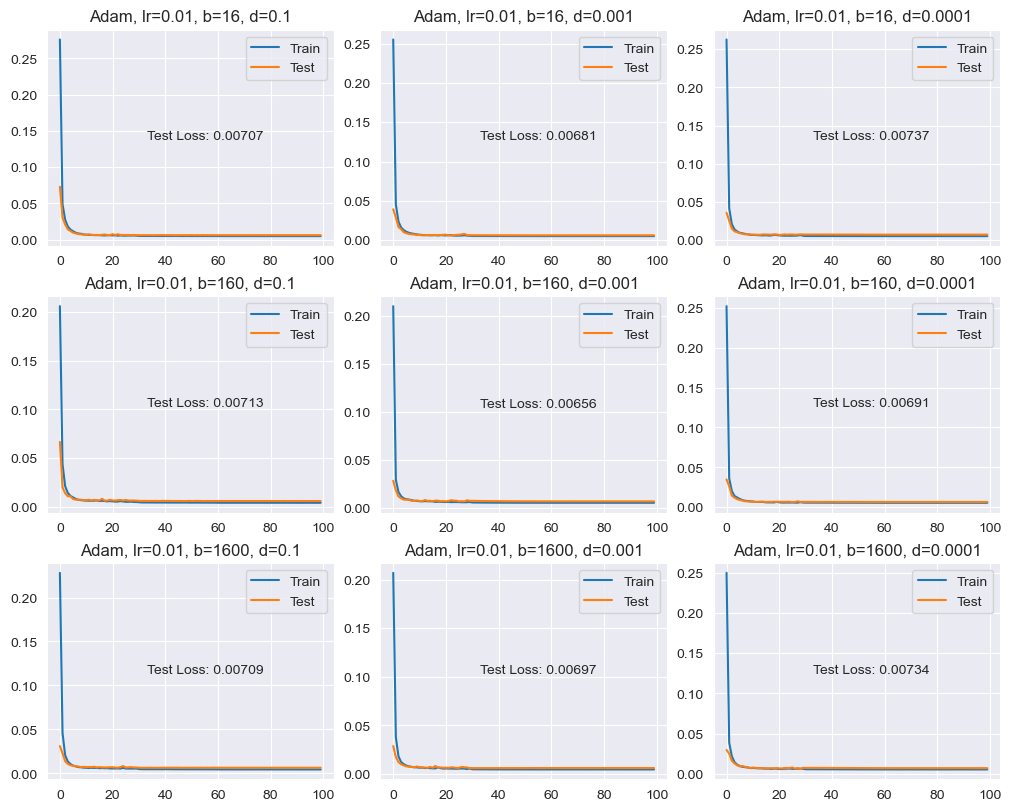

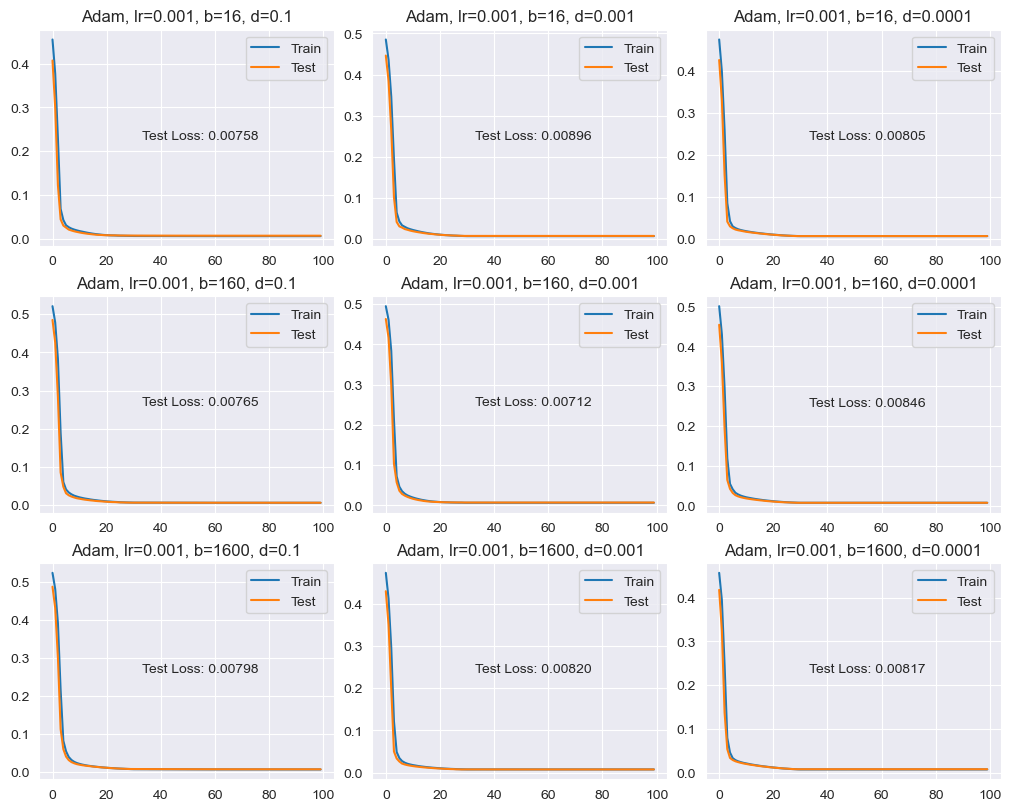

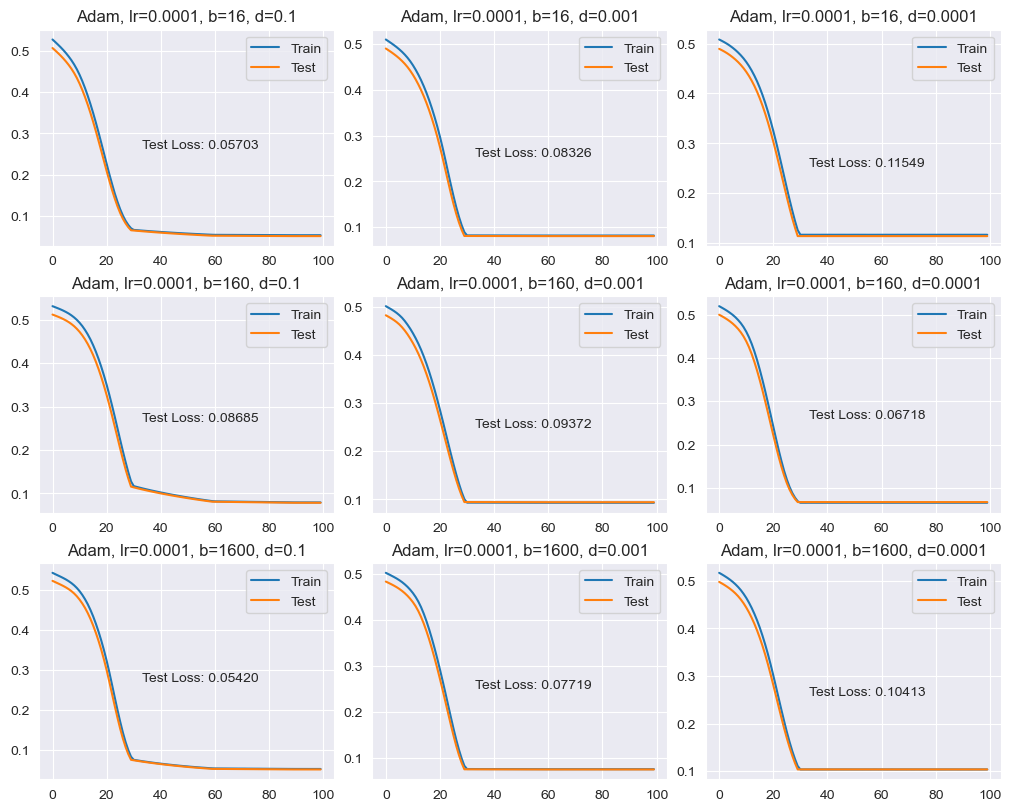

In [179]:
# Extract names and values
names = [item[0] for item in results]
train_losses_all = [item[-1] for item in results]
val_losses = [item[-1] for item in results]
test_loss = [item[-1] for item in results]
elapsed_time = [item[-1] for item in results]
epochs = np.arange(0, 100, 1)
# fig1, ax1 = plt.subplots(figsize=(12, 10))
# fig2, ax2 = plt.subplots(figsize=(12, 10))
# fig2, ax3 = plt.subplots(figsize=(12, 10))
# fig2, ax4 = plt.subplots(figsize=(12, 10))
losses_test = []
times = []
for name, optimizer_func in optimizers.items():
	for lr in learning_rates:
		fig, axs = plt.subplots(3, 3, figsize=(10, 8), layout='constrained')
		# fig2, axs2 = plt.subplots(3, 3, figsize=(10, 8), layout='constrained')
		i = 0
		for batch in batch_sizes:
			j = 0
			for decay in lr_decays:
				train_losses, val_losses, test_loss, elapsed_time = results[(name, lr, batch, decay)]
				axs[i][j].plot(epochs, train_losses, label='Train')
				# axs[i][j].legend()
				axs[i][j].set_title(f'{name}, lr={lr}, b={batch}, d={decay}')
				axs[i][j].text(epochs[len(epochs)//3], max(train_losses) / 2, f'Test Loss: {test_loss:.5f}')
				axs[i][j].plot(epochs, val_losses, label="Test")
				axs[i][j].legend()
				axs[i][j].set_ylim(0, min(0.))
				# plt.plot(epochs, train_losses, label=f'{name}, {lr}, {batch}, {decay}')
				# counter += 1
				j += 1
			i += 1
		plt.show()

# print(losses_test)
# print(times)
# Display the exact numbers on the bars
# for i, v in enumerate(values):
#     ax.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.show()